## Original tutorial : https://www.pycaret.org/tutorials/html/CLF101.html
## Other examples (Regression, Clustering, NLP, Anomaly detection, etc) : https://bit.ly/3vAWged 

<br>
<br>

## 0. 필수 라이브러리 설치

<br>
<br>

In [1]:
# (주의) pycaret / sklearn / scipy 외에 추가적으로 다른 라이브러리를 설치하실 경우 (sklearn & scipy 의 버전을 아래 코드들로 덮어써줄 수 있도록) 이 셀에서 먼저 설치해주세요 

# !pip install ~~~

In [2]:
!pip install pycaret==2.3.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.0 MB/s 
     |████████████████████████████████| 120 kB 856 kB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 1.7 MB 61.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 3.8 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.0 MB/s 
     |████████████████████████████████| 262 kB 29.5 MB/s 
     |████████████████████████████████| 17.8 MB 346 kB/s 
     |████████████████████████████████| 167 kB 51.9 MB/s 
     |████████████████████████████████| 6.8 MB 50.8 MB/s 
     |████████████████████████████████| 1.3 MB 50.9 MB/s 
     |████████████████████████████████| 11.

In [3]:
pip install jinja2==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 4.6 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
pip install xgboost==1.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.7 MB 30 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [5]:
# # (Backup)

!pip install pyyaml==5.4.1
!pip install pycaret==2.1.2
!pip install scikit-learn==0.23 # 반드시 Scikit-learn 버전을 맞춰줘야 합니다!
!pip install scipy==1.5.3 # 반드시 Scipy 버전을 맞춰줘야 합니다! 
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 4.9 MB/s 
     |████████████████████████████████| 76.6 MB 80.7 MB/s 
     |████████████████████████████████| 125 kB 48.4 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
  Attempting uninstall: pycaret
    Found existing installation: pycaret 2.3.10
    Uninstalling pycaret-2.3.10:
      Successfully uninstalled pycaret-2.3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, b

<hr>
<br>
<br>

<h2 style="color:red;"><b>[ 런타임 ] - [런타임 다시시작 ] 을 먼저 해주시고 다음 cell로 내려가주세요.</b></h2>

<br>
<br>
<hr>

<br>
<br>

## PyCaret을 활용한 low-code machine learning

<br>
<br>

In [2]:
from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import jinja2

In [3]:
train_df = pd.read_csv('train.csv', engine='python')
train_label_df = pd.read_csv('train_label.csv', engine='python')

train_df.summary_date = train_df.summary_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
new_data = pd.DataFrame()
new_data = pd.DataFrame()

for email in train_df['EMAIL'].unique():
    temp_df = train_df[train_df['EMAIL']==email]
    temp_row = pd.DataFrame(temp_df.describe().iloc[1]).transpose()
    new_data = pd.concat([new_data,temp_row])
    
new_data = new_data.drop('timezone', axis=1)
new_data = new_data.reset_index().drop('index',axis=1)

def outlier_iqr(series): 
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(series, 0.25), np.quantile(series, 0.75)          
    # IQR 계산하기     
    iqr = q75 - q25    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = series[series > upper]     
    data2 = series[series < lower]    
    
    # 이상치 총 개수 구하기
    outliers = data1.shape[0] + data2.shape[0]
    outliers = outliers/len(series)
    return outliers
    
outliers_array = []
for email in train_df['EMAIL'].unique():
    temp_df = train_df[train_df['EMAIL']==email]
    new_row = []
    outliers_array_col = []
    for i in range(len(temp_df.columns)):
        try:
            temp_deltas = np.diff(temp_df[temp_df.columns[i]])
            new_row.append(outlier_iqr(temp_deltas))
            outliers_array_col.append(temp_df.columns[i]+"_delta")
        except:
            pass
    outliers_array.append(new_row)

outliers_df = pd.DataFrame(outliers_array)
outliers_df.columns = outliers_array_col

train_df_pre = pd.concat([new_data,outliers_df],axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(train_df_pre)
train_scaled = scaler.transform(train_df_pre)

train_scaled = pd.DataFrame(train_scaled,columns=train_df_pre.columns)

data_df = pd.concat([train_df_pre,train_label_df],axis=1)

In [4]:
data_df = data_df.drop(['SAMPLE_EMAIL','timezone_delta'],axis=1)


In [5]:
data_df['sleep_is_longest'] = data_df['sleep_is_longest'].astype('float')
data_df['sleep_is_longest_delta'] = data_df['sleep_is_longest_delta'].astype('float')
data_df.head()

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_score_deep_delta,sleep_score_disturbances_delta,sleep_score_efficiency_delta,sleep_score_latency_delta,sleep_score_rem_delta,sleep_score_total_delta,sleep_temperature_delta_delta,sleep_temperature_deviation_delta,sleep_temperature_trend_deviation_delta,DIAG_NM
0,1.400436,324.232558,2445.581395,5934.837209,0.674419,591.906977,0.395349,292.534884,17.581395,5.186047,...,0.023810,0.023810,0.023810,0.119048,0.000000,0.000000,0.047619,0.047619,0.0,CN
1,1.340278,242.460317,2333.190476,3797.444444,0.174603,613.031746,0.301587,275.460317,8.777778,1.253968,...,0.032258,0.000000,0.016129,0.000000,0.000000,0.000000,0.016129,0.016129,0.0,CN
2,1.810020,1015.603175,3221.523810,18913.825397,26.634921,509.793651,0.571429,305.571429,159.571429,157.253968,...,0.000000,0.016129,0.032258,0.048387,0.000000,0.000000,0.000000,0.000000,0.0,MCI
3,1.467634,465.339286,2558.839286,8960.035714,1.839286,552.803571,0.446429,309.589286,32.535714,15.214286,...,0.072727,0.000000,0.018182,0.036364,0.018182,0.072727,0.000000,0.000000,0.0,CN
4,1.282012,211.024390,2223.756098,3963.560976,0.024390,657.902439,0.585366,146.292683,17.439024,0.170732,...,0.225000,0.075000,0.000000,0.000000,0.050000,0.075000,0.000000,0.000000,0.0,CN


In [6]:
model = setup(data=data_df, 
              target='DIAG_NM', 
              train_size=0.8, # default value
              session_id=0) # Random seed 


Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Multiclass
2,Label Encoded,"CN: 0, Dem: 1, MCI: 2"
3,Original Data,"(148, 104)"
4,Missing Values,False
5,Numeric Features,103
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


<br>
<br>

### 여러가지 모델에 대한 성능 비교

In [ ]:
# # 아래 cell 에서 compare_models 함수 실행 시, 
# # 활용하는 데이터의 상태에 따라 [ AttributeError: 'str' object has no attribute 'decode' ] 에러가 발생할 수 있습니다.
# # 이 경우에는 아래 코드를 대신 실행하여 비교 대상이 되는 모델 리스트에서 Logistic Regression 모델을 제외시켜주시기 바랍니다.

# top_3_models = compare_models(exclude=['lr'], 
#                               sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
#                               n_select = 3) # Select top n models 

In [7]:
top_3_models = compare_models(sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
                              n_select = 3) # Select top n models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Quadratic Discriminant Analysis,0.6538,0.0000,0.3667,0.4301,0.5181,0.0000,0.0000,0.0084
1,Light Gradient Boosting Machine,0.6432,0.0000,0.4149,0.5522,0.5869,0.1524,0.1570,0.0646
2,CatBoost Classifier,0.6371,0.0000,0.3925,0.4856,0.5437,0.0542,0.0502,16.4910
3,Extra Trees Classifier,0.6197,0.0000,0.3746,0.4980,0.5349,0.0218,0.0338,0.1456
4,Logistic Regression,0.6189,0.0000,0.3897,0.5608,0.5674,0.1068,0.1241,0.0383
5,K Neighbors Classifier,0.6136,0.0000,0.3937,0.5451,0.5602,0.0572,0.0651,0.0044
6,Naive Bayes,0.6121,0.0000,0.3990,0.6128,0.5972,0.1898,0.2040,0.0059
7,Random Forest Classifier,0.6023,0.0000,0.3682,0.4796,0.5223,-0.0012,-0.0022,0.1116
8,Gradient Boosting Classifier,0.5848,0.0000,0.3337,0.5145,0.5339,0.0202,0.0172,0.7358
9,Ridge Classifier,0.5758,0.0000,0.3631,0.5442,0.5464,0.0979,0.1006,0.0070


In [8]:
top_3_models

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),

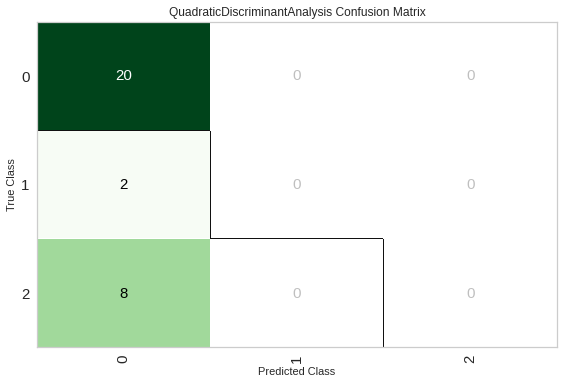

In [9]:
# evaluate_model로 얻어지는 plot을 직접 지정하여 별도로 출력할 수 있음

model_top = top_3_models[]

# plot_model(model_top, plot = 'auc')
# plot_model(model_top, plot = 'pr')
# plot_model(model_top, plot='feature')
plot_model(model_top, plot = 'confusion_matrix')

In [16]:
predict_model(top_3_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6667,0,0.3333,0.4444,0.5333,0.0,0.0


,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_score_efficiency_delta,sleep_score_latency_delta,sleep_score_rem_delta,sleep_score_total_delta,sleep_temperature_delta_delta,sleep_temperature_deviation_delta,sleep_temperature_trend_deviation_delta,DIAG_NM,Label,Score
0,1.464623,412.811321,2537.528302,7563.490566,0.566038,575.245283,0.396226,357.924528,24.867925,4.207547,...,0.019231,0.000000,0.000000,0.019231,0.057692,0.057692,0.0,CN,CN,1.0
1,1.317982,255.105263,2291.368421,4581.298246,0.947368,632.263158,1.350877,162.263158,25.280702,7.561404,...,0.035714,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,CN,CN,1.0
2,1.332212,275.584615,2174.492308,5408.553846,1.953846,539.384615,0.338462,235.446154,29.492308,11.430769,...,0.000000,0.078125,0.296875,0.046875,0.046875,0.046875,0.0,CN,CN,1.0
3,1.211483,127.139535,2115.302326,2164.395349,0.069767,651.860465,0.348837,123.837209,7.069767,0.488372,...,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,CN,CN,1.0
4,1.507812,535.166667,2622.152778,9700.138889,2.319444,506.041667,0.416667,295.333333,56.097222,16.152778,...,0.000000,0.070423,0.000000,0.014085,0.070423,0.070423,0.0,CN,CN,1.0
5,1.474167,455.506667,2148.293333,10080.520000,16.306667,570.653333,0.440000,151.573333,87.666667,103.840000,...,0.000000,0.027027,0.270270,0.148649,0.000000,0.000000,0.0,MCI,CN,1.0
6,1.482394,478.183099,2576.253521,8859.436620,0.577465,484.084507,0.267606,344.690141,45.464789,4.239437,...,0.085714,0.028571,0.028571,0.000000,0.028571,0.028571,0.0,CN,CN,1.0
7,1.368004,322.895522,2381.179104,5835.179104,1.313433,605.373134,0.686567,220.731343,29.985075,10.104478,...,0.060606,0.030303,0.000000,0.000000,0.045455,0.045455,0.0,MCI,CN,1.0
8,1.474813,486.791045,2565.164179,9500.940299,0.089552,552.656716,0.432836,309.522388,51.447761,0.626866,...,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.0,CN,CN,1.0
9,1.810020,1015.603175,3221.523810,18913.825397,26.634921,509.793651,0.571429,305.571429,159.571429,157.253968,...,0.032258,0.048387,0.000000,0.000000,0.000000,0.000000,0.0,MCI,CN,1.0


In [17]:
top_3_models = compare_models(sort='F1', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
                              n_select = 3) # Select top n models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,0.6121,0.0000,0.3990,0.6128,0.5972,0.1898,0.2040,0.0056
1,Light Gradient Boosting Machine,0.6432,0.0000,0.4149,0.5522,0.5869,0.1524,0.1570,0.0693
2,Logistic Regression,0.6189,0.0000,0.3897,0.5608,0.5674,0.1068,0.1241,0.0707
3,K Neighbors Classifier,0.6136,0.0000,0.3937,0.5451,0.5602,0.0572,0.0651,0.0074
4,Ridge Classifier,0.5758,0.0000,0.3631,0.5442,0.5464,0.0979,0.1006,0.0101
5,CatBoost Classifier,0.6371,0.0000,0.3925,0.4856,0.5437,0.0542,0.0502,16.4455
6,Extra Trees Classifier,0.6197,0.0000,0.3746,0.4980,0.5349,0.0218,0.0338,0.1463
7,Gradient Boosting Classifier,0.5848,0.0000,0.3337,0.5145,0.5339,0.0202,0.0172,0.7639
8,Random Forest Classifier,0.6023,0.0000,0.3682,0.4796,0.5223,-0.0012,-0.0022,0.1115
9,Extreme Gradient Boosting,0.5674,0.0000,0.3602,0.4949,0.5215,-0.0170,-0.0199,0.1874


In [19]:
predict_model(top_3_models[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7,0,0.375,0.6095,0.6089,0.1667,0.2455


,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,...,sleep_score_efficiency_delta,sleep_score_latency_delta,sleep_score_rem_delta,sleep_score_total_delta,sleep_temperature_delta_delta,sleep_temperature_deviation_delta,sleep_temperature_trend_deviation_delta,DIAG_NM,Label,Score
0,1.464623,412.811321,2537.528302,7563.490566,0.566038,575.245283,0.396226,357.924528,24.867925,4.207547,...,0.019231,0.000000,0.000000,0.019231,0.057692,0.057692,0.0,CN,CN,0.8290
1,1.317982,255.105263,2291.368421,4581.298246,0.947368,632.263158,1.350877,162.263158,25.280702,7.561404,...,0.035714,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,CN,CN,0.8250
2,1.332212,275.584615,2174.492308,5408.553846,1.953846,539.384615,0.338462,235.446154,29.492308,11.430769,...,0.000000,0.078125,0.296875,0.046875,0.046875,0.046875,0.0,CN,CN,0.9677
3,1.211483,127.139535,2115.302326,2164.395349,0.069767,651.860465,0.348837,123.837209,7.069767,0.488372,...,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,CN,CN,0.7660
4,1.507812,535.166667,2622.152778,9700.138889,2.319444,506.041667,0.416667,295.333333,56.097222,16.152778,...,0.000000,0.070423,0.000000,0.014085,0.070423,0.070423,0.0,CN,CN,0.9590
5,1.474167,455.506667,2148.293333,10080.520000,16.306667,570.653333,0.440000,151.573333,87.666667,103.840000,...,0.000000,0.027027,0.270270,0.148649,0.000000,0.000000,0.0,MCI,CN,0.9983
6,1.482394,478.183099,2576.253521,8859.436620,0.577465,484.084507,0.267606,344.690141,45.464789,4.239437,...,0.085714,0.028571,0.028571,0.000000,0.028571,0.028571,0.0,CN,CN,0.7273
7,1.368004,322.895522,2381.179104,5835.179104,1.313433,605.373134,0.686567,220.731343,29.985075,10.104478,...,0.060606,0.030303,0.000000,0.000000,0.045455,0.045455,0.0,MCI,CN,0.6872
8,1.474813,486.791045,2565.164179,9500.940299,0.089552,552.656716,0.432836,309.522388,51.447761,0.626866,...,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.0,CN,CN,0.9852
9,1.810020,1015.603175,3221.523810,18913.825397,26.634921,509.793651,0.571429,305.571429,159.571429,157.253968,...,0.032258,0.048387,0.000000,0.000000,0.000000,0.000000,0.0,MCI,CN,0.6142


<br>
<br>

### 선택한 모델을 바탕으로 blending


In [13]:
blended = blend_models(estimator_list=top_3_models, fold=10, method = 'hard')

# method 'hard' : uses predicted class labels for majority rule voting.
# method 'soft' : predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:00:02
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


ValueError: ignored

In [ ]:
predict_model(blended) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8022,0.7826,0.6887,0.7849,0.7337,0.5775,0.5806


,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,isAlone_1,Survived,Label
0,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
2,2.0,0.0,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
3,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
264,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
266,1.0,0.0,1.6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [ ]:
# finalize_model() 
# - fits the model onto the complete dataset including the test/hold-out sample (30% in this case). 
# - The purpose of this function is to train the model on the complete dataset before it is deployed in production.

final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=9, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             su...
                             ('ridge',
                   

In [ ]:
predict_model(final_blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8097,0.792,0.7075,0.7895,0.7463,0.5948,0.597


,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,isAlone_1,Survived,Label
0,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
2,2.0,0.0,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
3,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
264,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
266,1.0,0.0,1.6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [ ]:
# data_unseen = ? # unseen data as pd.DataFrame (without labels)

# unseen_predictions = predict_model(final_blended, data=data_unseen)
# unseen_predictions


titanic_df = pd.read_csv("titanic_modified.csv")
holdout_data = titanic_df.sample(frac=0.10, random_state=0).reset_index(drop=True)

unseen_predictions = predict_model(final_blended, data=holdout_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8539,0.8418,0.7436,0.9062,0.8169,0.6974,0.7068


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone,Label
0,0,3,0,1.0,0.0,2,3,0.0,1,0
1,0,3,0,1.0,0.0,0,3,0.0,1,0
2,0,3,0,0.0,0.0,1,1,2.0,0,0
3,1,1,1,2.0,1.0,2,4,0.4,0,1
4,1,3,1,1.0,0.0,2,4,0.8,0,1
...,...,...,...,...,...,...,...,...,...,...
84,0,2,0,2.0,0.0,0,3,0.0,1,0
85,1,1,1,1.0,0.0,0,2,0.0,1,1
86,1,1,1,2.0,2.0,2,2,0.0,1,1
87,1,3,1,3.0,0.0,0,4,0.0,1,1


<br>
<br>

### 2-5. 모델 저장 & 불러오기

In [ ]:
save_model(final_blended, 'final_blended')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                                RidgeClassifier(alpha=1.0,
                                                                class_weight=None,
                                                                copy_X=True,
                                       

In [ ]:
!ls

final_blended.pkl  logs.log  sample_data  titanic_modified.csv


In [ ]:
files.download('final_blended.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded_model = load_model('final_blended')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# data_unseen = ? # unseen data as pd.DataFrame (without labels)

# unseen_predictions = predict_model(final_blended, data=data_unseen)
# unseen_predictions

unseen_predictions = predict_model(loaded_model, data=holdout_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8539,0.8418,0.7436,0.9062,0.8169,0.6974,0.7068


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone,Label
0,0,3,0,1.0,0.0,2,3,0.0,1,0
1,0,3,0,1.0,0.0,0,3,0.0,1,0
2,0,3,0,0.0,0.0,1,1,2.0,0,0
3,1,1,1,2.0,1.0,2,4,0.4,0,1
4,1,3,1,1.0,0.0,2,4,0.8,0,1
...,...,...,...,...,...,...,...,...,...,...
84,0,2,0,2.0,0.0,0,3,0.0,1,0
85,1,1,1,1.0,0.0,0,2,0.0,1,1
86,1,1,1,2.0,2.0,2,2,0.0,1,1
87,1,3,1,3.0,0.0,0,4,0.0,1,1


<br>

\+ 
<br>
Binary Classification Tutorial (CLF102) - Level Intermediate @ https://j.mp/2T6i79m
<br>
Binary Classification Tutorial (CLF103) - Level Expert @ https://j.mp/3k8Kpw5